## Movie 3: Functional roles of NHE1 and/or SWELL1 in cell dissemination from 3D breast cancer spheroids embedded in 3D collagen gels 

In [127]:
%matplotlib inline
from skimage import io
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

movie3_path = "movies/movie3.avi"

In [129]:
# This cell was used to store each frame from the video to be used for calibrating and testing parameters
# movie_path = "movies/movie3.avi"
# output_path = "movies/movie3"
# movie = cv2.VideoCapture(movie_path)
# count = 0
# while movie.isOpened():
#    count += 1
#    success, frame = movie.read()
#    if not success:
#        break
#    cv2.imwrite(f'{output_path}/frame{count}.jpg', frame)

#movie.release()
#cv2.destroyAllWindows()


## Calibrate and estimate parameters for segments
### Approach for measuring cell migration rate
- Each grayed frame was segmented based on entropy - Amount of disorder
- The mean pixel value of each entropy frame is used to represent the extent of cell migration
- By subtracting the starting mean pixel, the change in entropy with respect to the starting position is obtained
### Applying the algorithm,
- For this movie, an inverted gray image of each frame was used because there were a lot of dark regions in the spheroid
- Regions of each frame that were not relevant for the analysis were covered by drawing empty (black colored) rectangles over the inverted frames

In [132]:
img_raw = io.imread("movies/movie3/frame1.jpg")

sc_frame = img_raw[80:, :1250]
sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)
sc_frame_gray_inverted = cv2.bitwise_not(sc_frame_gray)

dual_kd_frame = img_raw[200:800, 1550:2300]
dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)
dual_kd_frame_gray_inverted = cv2.bitwise_not(dual_kd_frame_gray)

dual_kd_black_spot1 = dual_kd_frame_gray_inverted[0:200, 620:]

sc_black_spot1 = sc_frame_gray_inverted[650:, 850:]
sc_black_spot2 = sc_frame_gray_inverted[350:650, 1180:]
sc_black_spot3 = sc_frame_gray_inverted[750:, 800:850]
sc_black_spot4 = sc_frame_gray_inverted[500:650, 1100:1180]

sc_black_spot1_replacement = np.ones((sc_black_spot1.shape), np.uint8)
sc_black_spot2_replacement = np.ones((sc_black_spot2.shape), np.uint8)
sc_black_spot3_replacement = np.ones((sc_black_spot3.shape), np.uint8)
sc_black_spot4_replacement = np.ones((sc_black_spot4.shape), np.uint8)

dual_kd_black_spot1_replacement = np.ones((dual_kd_black_spot1.shape), np.uint8)

sc_frame_gray_inverted[650:, 850:] = sc_black_spot1_replacement
sc_frame_gray_inverted[350:650, 1180:] = sc_black_spot2_replacement
sc_frame_gray_inverted[750:, 800:850] = sc_black_spot3_replacement
sc_frame_gray_inverted[500:650, 1100:1180] = sc_black_spot4_replacement

dual_kd_frame_gray_inverted[0:200, 620:] = dual_kd_black_spot1_replacement

sc_entropy_frame = entropy(sc_frame_gray_inverted, disk(5))
dual_kd_entropy_frame = entropy(dual_kd_frame_gray_inverted, disk(5))

print("SC Entropy:", cv2.mean(sc_entropy_frame)[0])
print("Dual KD Entropy:", cv2.mean(dual_kd_entropy_frame)[0])
img_raw.shape

SC Entropy: 4.378984635992757
Dual KD Entropy: 4.799028250929498


(1024, 2560, 3)

## Mean pixels of entropy frames as measure of cell migration rate
- The mean pixel values obtained with 'cv2.mean()' are used as entropy values
- Each value in each frame is appended to the 'entropies' list which will be converted to a Pandas dataframe for analysis
- The time interval between each frame is 20 minutes.
#### May be a little slow

In [135]:
print("Press 'q' to end video")
cap = cv2.VideoCapture(movie3_path)


# Get movie frame size
width = 640
height = 480
frame_size = (width,height)

output_frames = "movies/out3"

frame_index = 0 # Track frame number for fluorescent intensity table

entropies = []

while True:
    frame_index += 1
    success, frame = cap.read()

    if success and frame.size != 0:
        # Isolate regions of interest
        sc_frame = frame[80:, :1250]
        sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
        sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)
        sc_frame_gray_inverted = cv2.bitwise_not(sc_frame_gray)

        dual_kd_frame = frame[200:800, 1550:2300]
        dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
        dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)
        dual_kd_frame_gray_inverted = cv2.bitwise_not(dual_kd_frame_gray)

        dual_kd_black_spot1 = dual_kd_frame_gray_inverted[0:200, 620:]

        sc_black_spot1 = sc_frame_gray_inverted[650:, 850:]
        sc_black_spot2 = sc_frame_gray_inverted[350:650, 1180:]
        sc_black_spot3 = sc_frame_gray_inverted[750:, 800:850]
        sc_black_spot4 = sc_frame_gray_inverted[500:650, 1100:1180]

        sc_black_spot1_replacement = np.ones((sc_black_spot1.shape), np.uint8)
        sc_black_spot2_replacement = np.ones((sc_black_spot2.shape), np.uint8)
        sc_black_spot3_replacement = np.ones((sc_black_spot3.shape), np.uint8)
        sc_black_spot4_replacement = np.ones((sc_black_spot4.shape), np.uint8)

        dual_kd_black_spot1_replacement = np.ones((dual_kd_black_spot1.shape), np.uint8)

        sc_frame_gray_inverted[650:, 850:] = sc_black_spot1_replacement
        sc_frame_gray_inverted[350:650, 1180:] = sc_black_spot2_replacement
        sc_frame_gray_inverted[750:, 800:850] = sc_black_spot3_replacement
        sc_frame_gray_inverted[500:650, 1100:1180] = sc_black_spot4_replacement

        dual_kd_frame_gray_inverted[0:200, 620:] = dual_kd_black_spot1_replacement

        sc_entropy_frame = entropy(sc_frame_gray_inverted, disk(5))
        dual_kd_entropy_frame = entropy(dual_kd_frame_gray_inverted, disk(5))

        sc_entropy = cv2.mean(sc_entropy_frame)[0]
        dual_kd_entropy = cv2.mean(dual_kd_entropy_frame)[0]

        print(sc_entropy, dual_kd_entropy)

        # Append entropy data
        entropies.append([frame_index, sc_entropy, dual_kd_entropy, (frame_index*20)-20])

        # Add regions to blank canvas
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_gray = cv2.cvtColor(frame_gray, cv2.COLOR_BGR2GRAY)
        canvas = np.ones((frame_gray.shape), np.uint8)
        canvas[80:, :1250] = sc_frame_gray_inverted
        canvas[200:800, 1550:2300] = dual_kd_frame_gray_inverted

        # Resize frame
        sc = cv2.resize(sc_frame_gray_inverted, frame_size)
        dual_kd = cv2.resize(dual_kd_frame_gray_inverted, frame_size)

        sc_dual_kd_stack = np.hstack((sc, dual_kd))

        cv2.imwrite(f'{output_frames}/frame{frame_index}.jpg', sc_dual_kd_stack, [cv2.IMWRITE_JPEG_QUALITY, 90])

        cv2.imshow("Movie 3", sc_dual_kd_stack)

    else:
        break

    # 1 frame per second
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save video
video_frames = os.listdir(output_frames)
video_frame = cv2.imread(os.path.join(output_frames, video_frames[0]))
height, width, layers = video_frame.shape

video = cv2.VideoWriter('output3.avi', 0, 1, (width, height))
for f in video_frames:
    video.write(cv2.imread(os.path.join(output_frames, f)))

video.release()
cap.release()
cv2.destroyAllWindows()
print("Video saved in movies/out3")

Press 'q' to end video
4.378435835601718 4.798004641978683
4.379228028854046 4.792591404128509
4.380603490571506 4.803930805693747
4.38372542488228 4.802567663203973
4.383172473360572 4.806989845517965
4.376503159089333 4.779133405309061
4.379695729845625 4.800063292219728
4.386990480773129 4.804781294399933
4.38960774408457 4.804465174206351
4.394069401861829 4.812614328065954
4.390569077974212 4.806582232759234
4.395492980959198 4.806453142865527
4.396612973507684 4.809930210990068
4.401478624715248 4.805252886106651
4.40034142168175 4.815902471416009
4.39704535514216 4.8188831446129345
4.404717693205269 4.8207557233925105
4.406459627848046 4.807943353106538
4.406744665602844 4.81401580278595
4.40643539834784 4.8159337763424395
4.408680414118199 4.811927805076283
4.4128082428059034 4.818063419937106
4.416937744513822 4.821764244471333
4.420772017398038 4.832734300672538
4.424981834987658 4.826844776045982
4.422940800152469 4.804820363848015
4.42775548887818 4.839537833746164
4.429156

## Calculate change in entropy
- SC: Scramble Control
- DUAL_KD: Dual NHE1/SWELL1 Knockdown

In [139]:
entropies_dataframe = pd.DataFrame(entropies, columns =  ["Frame", "SC", "DUAL_KD","Time"])
entropies_dataframe["SC_ENTROPY_CHANGE"] = entropies_dataframe["SC"] - entropies_dataframe["SC"][0]
entropies_dataframe["DUAL_KD_ENTROPY_CHANGE"] = entropies_dataframe["DUAL_KD"] - entropies_dataframe["DUAL_KD"][0]

entropies_dataframe.describe()

,Frame,SC,DUAL_KD,Time,SC_ENTROPY_CHANGE,DUAL_KD_ENTROPY_CHANGE
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,37.000000,4.445337,4.841844,720.000000,0.066902,0.043839
std,21.217131,0.042071,0.029327,424.342629,0.042071,0.029327
min,1.000000,4.376503,4.779133,0.000000,-0.001933,-0.018871
25%,19.000000,4.406460,4.815902,360.000000,0.028024,0.017898
50%,37.000000,4.446041,4.840666,720.000000,0.067605,0.042661
75%,55.000000,4.483309,4.865836,1080.000000,0.104873,0.067832
max,73.000000,4.511877,4.891062,1440.000000,0.133441,0.093057


## Compare Entropy change in SC cells and Dual KD cells

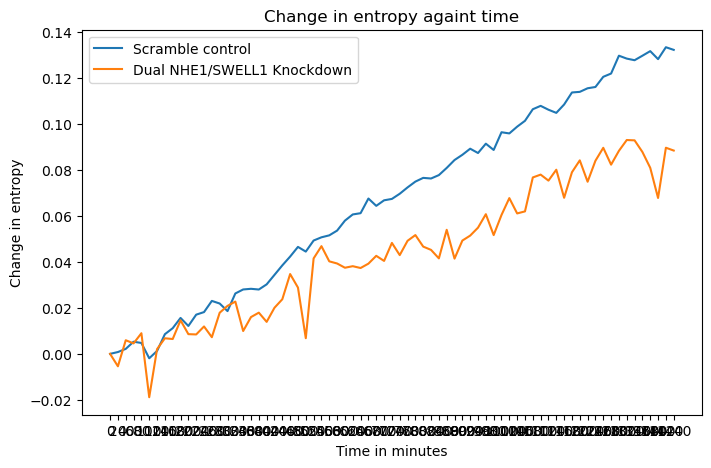

In [142]:
plt.figure(figsize=(8,5))
plt.plot(entropies_dataframe.Time, entropies_dataframe.SC_ENTROPY_CHANGE, label="Scramble control")
plt.plot(entropies_dataframe.Time, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE, label="Dual NHE1/SWELL1 Knockdown")

plt.title("Change in entropy againt time")
plt.ylabel("Change in entropy")
plt.xlabel("Time in minutes")
plt.legend()
plt.xticks(entropies_dataframe.Time)
plt.show()

- SC cells migrate faster over time
- Dual NHE1/SWELL1 knockdown cells show minimal migration

### Slope from fitted regression models

#### Regression model for Entropy change in SC cells

In [147]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(entropies_dataframe.Frame, entropies_dataframe.SC_ENTROPY_CHANGE)
print({"slope":slope, "intercept":intercept, "r":r, "p":p, "std_err":std_err})

{'slope': 0.0019782343207210198, 'intercept': -0.006293030110502959, 'r': 0.9976574332990302, 'p': 1.8549540495197714e-84, 'std_err': 1.609806237344797e-05}


### Regression model for Entropy change in Dual Knockdown cells

In [150]:
slope, intercept, r, p, std_err = stats.linregress(entropies_dataframe.Frame, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE)
print({"slope":slope, "intercept":intercept, "r":r, "p":p, "std_err":std_err})

{'slope': 0.0013396184567012852, 'intercept': -0.005726812882166178, 'r': 0.9691786112114945, 'p': 6.156997267175579e-45, 'std_err': 4.0412599211976294e-05}


- The slope of the regression model for entropy change in SC cells is greater (0.00198) than that for Dual KD cells (0.00134)
- Therefore cell migration is faster in SC cells than in Dual KD cells